# Soal 2 - EDA (Exploratory Data Analysis) Home Credit

### Banyak orang berjuang untuk mendapatkan pinjaman dari bank atau institusi financial lain (leasing) karena sejarah pembayaran kredit mereka yang tidak layak atau bahkan tidak ada dan sayangnya, banyak orang seperti ini yang sering dimanfaatkan oleh pemberi pinjaman (bank atau leasing) yang tidak dapat dipercaya.


## Importing Library and File

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
df = pd.read_csv(r'D:\maxevin\PURWADHIKA\MODUL 2\EXERCISE\EXAM\application_train.csv')
df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Checking On Null Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
df1 = df.dropna()
df1.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

## 1. Untuk feature/column AMT_INCOME_TOTAL & AMT_CREDIT, hitung dan beri penjelasan (insight) terkait:

 - **Titik Pusat Data (Central Tendency)**
 
   - Feature 'AMT_INCOME_TOTAL' & 'AMT_CREDIT' tidak memiliki missing data karena sudah dilakukan pembersihan(.dropna) pada tahap awal
   
   - Memastikan apakah Feature 'AMT_INCOME_TOTAL' & 'AMT_CREDIT' memiliki data outliers atau tidak

C:\Users\Maxevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


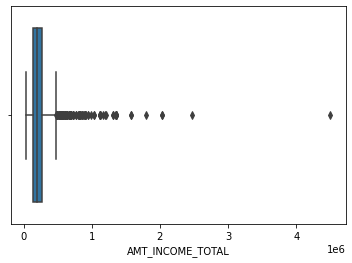

In [9]:
# Cek Outliers pada feature AMT_INCOME_TOTAL
sns.boxplot(df1['AMT_INCOME_TOTAL'])
plt.show()

C:\Users\Maxevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


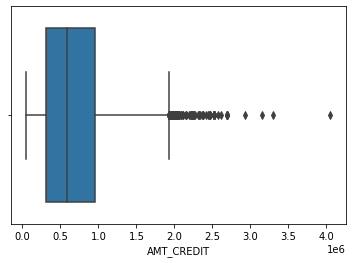

In [10]:
# Cek Outliers pada Feature AMT_CREDIT
sns.boxplot(df1['AMT_CREDIT'])
plt.show()

- Setelah dilakukan pengecekkan, dapat dilihat terdapat sangat banyak data outliers. Sehingga menentukan titik pusat data lebih tepat menggunakan median

In [11]:
df1[['AMT_INCOME_TOTAL','AMT_CREDIT']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,8602.0,222872.414439,141420.411520,33750.0,135000.0,193500.0,270000.0,4500000.0
AMT_CREDIT,8602.0,699998.701639,464911.858971,45000.0,315000.0,585000.0,958144.5,4050000.0


In [15]:
# Penentuan titik pusat data untuk feature AMT_INCOME_TOTAL
q1_ait = df1['AMT_INCOME_TOTAL'].quantile(0.25)
q2_ait = df1['AMT_INCOME_TOTAL'].quantile(0.50)
q3_ait = df1['AMT_INCOME_TOTAL'].quantile(0.75)
iqr_ait = q3_ait - q1_ait
lower_whisker_ait = q1_ait - 1.5*iqr_ait
upper_whisker_ait = q3_ait + 1.5*iqr_ait

print('Nilai tengah dari feature AMT_INCOME_TOTAL adalah',q2_ait)
print('Nilai bawah dari feature AMT_INCOME_TOTAL adalah', q1_ait)
print('Nilai atas dari feature AMT_INCOME_TOTAL adalah', q3_ait)
print('Dengan lower whisker',lower_whisker_ait,'dan upper whisker',upper_whisker_ait)

Nilai tengah dari feature AMT_INCOME_TOTAL adalah 193500.0
Nilai bawah dari feature AMT_INCOME_TOTAL adalah 135000.0
Nilai atas dari feature AMT_INCOME_TOTAL adalah 270000.0
Dengan lower whisker -67500.0 dan upper whisker 472500.0


In [16]:
# Penentuan titik pusat data untuk feature AMT_CREDIT
q1_credit = df1['AMT_CREDIT'].quantile(0.25)
q2_credit = df1['AMT_CREDIT'].quantile(0.50)
q3_credit = df1['AMT_CREDIT'].quantile(0.75)
iqr_credit = q3_credit - q1_credit
lower_whisker_credit = q1_credit - 1.5*iqr_credit
upper_whisker_credit = q3_credit + 1.5*iqr_credit

print('Nilai tengah dari feature AMT_CREDIT adalah',q2_credit)
print('Nilai bawah dari feature AMT_CREDIT adalah', q1_credit)
print('Nilai atas dari feature AMT_CREDITadalah', q3_credit)
print('Dengan lower whisker',lower_whisker_credit,'dan upper whisker',upper_whisker_credit)

Nilai tengah dari feature AMT_CREDIT adalah 585000.0
Nilai bawah dari feature AMT_CREDIT adalah 315000.0
Nilai atas dari feature AMT_CREDITadalah 958144.5
Dengan lower whisker -649716.75 dan upper whisker 1922861.25


### Insight : Sebaiknya menerima peminjam yang memiliki income tidak lebih dari 135000 untuk meminimalisir resiko tidak kemampuan bayar cicilan kredit. Selain itu terdapat kredit yang jumlah besar sejumlah 958145

- **Persebaran Data (Dispersion)**

In [17]:
stdev_ait = df1['AMT_INCOME_TOTAL'].std()
stdev_cred = df1['AMT_CREDIT'].std()
mean_ait = df1['AMT_INCOME_TOTAL'].mean()
mean_cred = df1['AMT_CREDIT'].mean()

print('Standard Deviation dari feature AMT_INCOME_TOTAL adalah', stdev_ait)
print('Standard Deviation dari feature AMT_CREDIT adalah', stdev_cred)

print('Nilai tengah dari feature AMT_INCOME_TOTAL adalah',mean_ait)
print('Nilai tengah dari feature AMT_CREDIT adalah',mean_cred)

Standard Deviation dari feature AMT_INCOME_TOTAL adalah 141420.4115199489
Standard Deviation dari feature AMT_CREDIT adalah 464911.85897128994
Nilai tengah dari feature AMT_INCOME_TOTAL adalah 222872.41443850266
Nilai tengah dari feature AMT_CREDIT adalah 699998.7016391536


### Insight : Untuk meminimalisir resiko kemampuan membayar pinjaman sebaiknya pihak bank memberikan pinjaman kepada orang yang memiliki pendapatan kurang lebih dari 222.873 karena kemampuan bayar yang cukup tinggi 

 - **Distribusi Data (Distribution)**

C:\Users\Maxevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Maxevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


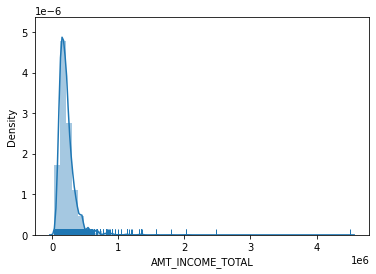

In [18]:
sns.distplot(df1['AMT_INCOME_TOTAL'], rug = True)
plt.show()

In [19]:
stats.skewtest(df1['AMT_INCOME_TOTAL']), stats.kurtosistest(df1['AMT_INCOME_TOTAL'])
# Dapat dilihat pada grafik, data penghasilan memiliki penumpukan yang sangat besar yang memuncak pada penghasilan range 200.000 - 300.000
# Namun terdapat 1 data yang memiliki penghasilan 4.500.000 yang membuat kekeliruan dimana pengehasilan sebesar ini masih ingin melakukan pinjaman ke Bank dan data tersebut perlu ditelusuri lebih lanjut

(SkewtestResult(statistic=85.90533678287072, pvalue=0.0),
 KurtosistestResult(statistic=59.27734403126037, pvalue=0.0))

C:\Users\Maxevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Maxevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


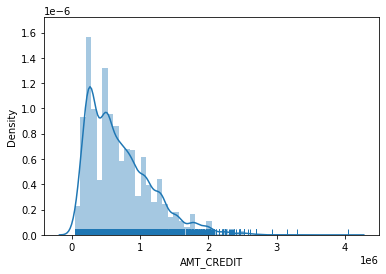

In [20]:
sns.distplot(df1['AMT_CREDIT'], rug = True)
plt.show()

In [21]:
stats.skewtest(df1['AMT_CREDIT']), stats.kurtosistest(df1['AMT_CREDIT'])
# Dapat dilihat pada grafik terdapat pattern bimodal yang memiliki 2 puncak di angka 300.000 dan 600.000 yang menyimpulkan bahwa jumlah kredit berjalan (outstanding) sangat banyak di range angka tersebut

(SkewtestResult(statistic=35.45229738312025, pvalue=2.673617005031113e-275),
 KurtosistestResult(statistic=17.18318320993608, pvalue=3.5489165872953997e-66))

## 2. Carilah data outlier dan beri penjelasan (insight) pada feature/column DAYS_EMPLOYED ! Tambahkan plot untuk menampilkan adanya data outlier!

C:\Users\Maxevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


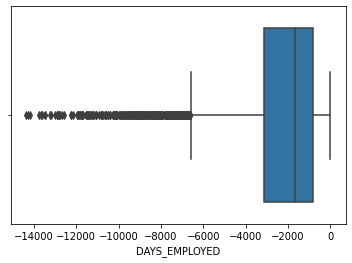

In [22]:
sns.boxplot(df1['DAYS_EMPLOYED'])
plt.show()

In [24]:
# Penentuan titik pusat data untuk feature DAYS_EMPLOYED
q1_de = df1['DAYS_EMPLOYED'].quantile(0.25)
q2_de = df1['DAYS_EMPLOYED'].quantile(0.50)
q3_de = df1['DAYS_EMPLOYED'].quantile(0.75)
iqr_de = q3_de - q1_de
lower_whisker_de = q1_de - 1.5*iqr_de
upper_whisker_de = q3_de + 1.5*iqr_de

print('Nilai tengah dari feature DAYS EMPLOYED adalah',q2_credit)
print('Nilai bawah dari feature DAYS_EMPLOYED adalah', q1_credit)
print('Nilai atas dari feature DAYS_EMPLOYED adalah', q3_credit)
print('Dengan lower whisker',lower_whisker_de,'dan upper whisker',upper_whisker_de)

Nilai tengah dari feature DAYS EMPLOYED adalah 585000.0
Nilai bawah dari feature DAYS_EMPLOYED adalah 315000.0
Nilai atas dari feature DAYS_EMPLOYED adalah 958144.5
Dengan lower whisker -6605.75 dan upper whisker 2656.25


In [25]:
outliers_de = df1[(df1['DAYS_EMPLOYED'] > upper_whisker_de) | (df1['DAYS_EMPLOYED'] < lower_whisker_de)]['DAYS_EMPLOYED']
outliers_de

296       -7115
2167      -7514
2480     -11534
5135      -8478
5488     -10624
          ...  
303321    -8951
303374    -8091
303842    -7165
304491   -10196
304743    -6655
Name: DAYS_EMPLOYED, Length: 428, dtype: int64

### Insight: Terdapat 428 data yang memiliki jumlah hari kerja lebih kecil dari 315000 yang disimpulkan bahwa data tersebut tidak memiliki cukup banyak pengalaman dalam bekerja dan tidak dapat diberikan pinjaman Bank

In [26]:
data_bersih = df1.loc[(df1['DAYS_EMPLOYED'] > lower_whisker_de) & (df['DAYS_EMPLOYED'] < upper_whisker_de)]
print('Data sebelum outlier dihapus:', df1.shape)
print('Data setelah outlier dihapus:',data_bersih.shape)

Data sebelum outlier dihapus: (8602, 122)
Data setelah outlier dihapus: (8174, 122)


C:\Users\Maxevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


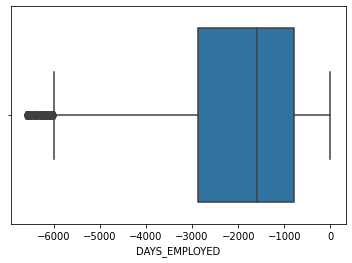

In [27]:
sns.boxplot(data_bersih['DAYS_EMPLOYED'])
plt.show()

## 3. Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column DAYS_BIRTH. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

C:\Users\Maxevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


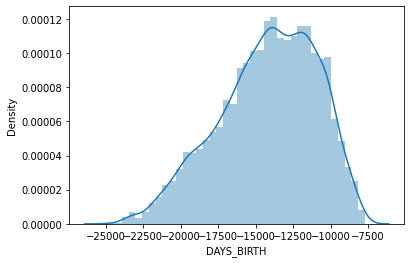

In [28]:
sns.distplot(df1['DAYS_BIRTH'])
plt.show()

### Insight : Sebaiknya memberikan pinjaman kepada orang yang memiliki rentan umur 27 - 41 tahun dikarenakan jumlah konsumen yang sangat besar didapatkan pada umur tersebut

## 4. Buatlah plot yang tepat mengenai kelompok umur yang gagal melakukan pembayaran. Untuk umur bisa menggunakan variabel DAYS_BIRTH dan identifier apakah orang tersebut gagal melakukan pembayaran adalah TARGET. Kelompok umur adalah tiap 5 tahun. Ex : 20-25 tahun, 26-30 tahun, etc. Jelaskan (insight) dari plot yang Anda buat!

## 5. Di antara NAME_INCOME_TYPE, DAYS_BIRTH, & REGION_RATING_CLIENT_W_CITY, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column TARGET? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

In [29]:
df_corr = df1[['NAME_INCOME_TYPE', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'TARGET']]
df_corr

,NAME_INCOME_TYPE,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,TARGET
71,Working,-15406,2,0
124,Working,-16282,2,0
152,Commercial associate,-11375,2,0
161,Commercial associate,-13972,2,0
255,Commercial associate,-11356,1,1
...,...,...,...,...
307358,Commercial associate,-15006,2,0
307359,Working,-14007,3,0
307407,Commercial associate,-11407,2,1
307456,Working,-20246,2,0


In [34]:
print(stats.normaltest(df1['NAME_INCOME_TYPE'].astype('float')))
print(stats.normaltest(df1['DAYS_BIRTH'].astype('float')))
print(stats.normaltest(df1['REGION_RATING_CLIENT_W_CITY'].astype('float')))
print(stats.normaltest(df1['TARGET'].astype('float')))

ValueError: could not convert string to float: 'Working'

## 6. Temukan NAME_INCOME_TYPE yang rata-rata income (AMT_INCOME_TOTAL) paling tinggi, serta tampilkan NAME_INCOME_TYPE dan rata-rata salary dalam bentuk Barplot! Lalu carilah:

- **TigaNAME_EDUCATION_TYPE yang memiliki rata-rata salary tertinggi!**

In [75]:
top_education = df1.groupby('NAME_EDUCATION_TYPE').mean()
top3_education = top_education.sort_values(by='AMT_INCOME_TOTAL',ascending=False).head(3)
top3_education

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
NAME_EDUCATION_TYPE,,,,,,,,,,,,,,,,,,,,,
Academic degree,300926.000000,0.000000,0.333333,392250.000000,776629.500000,41752.500000,732000.000000,0.030030,-15864.333333,-3408.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.666667,2.000000
Higher education,279780.378938,0.045132,0.601476,258033.351689,775579.073375,34090.974312,709794.406188,0.024839,-14099.292932,-2281.707352,...,0.013909,0.000852,0.001419,0.000284,0.005961,0.006529,0.042293,0.377803,0.250639,1.575930
Incomplete higher,273114.244898,0.056122,0.551020,227106.711735,659869.679847,30924.298469,590886.206633,0.024100,-12236.477041,-1859.849490,...,0.010204,0.000000,0.002551,0.000000,0.012755,0.012755,0.033163,0.494898,0.216837,1.772959


<BarContainer object of 3 artists>

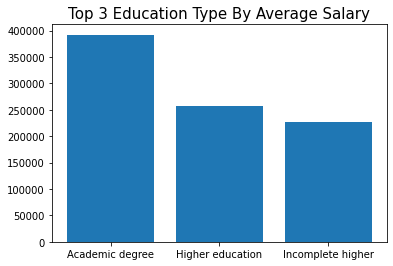

In [76]:
fig, ax = plt.subplots()
ax.set_title('Top 3 Education Type By Average Salary',size=15)
ax.bar(top3_education.index,top3_education['AMT_INCOME_TOTAL'])

### Insight : Academic Degree menduduki peringkat pertama dengan rata-rata berpenghasilan 392.250 dan diikuti yang ke-2 Higher Education dan Incomplete Higher

 - **Lima tipe pekerjaan (OCCUPATION_TYPE) yang memiliki rata-rata salary tertinggi!**

In [78]:
df_occupation = df1[['OCCUPATION_TYPE','AMT_INCOME_TOTAL']].groupby('OCCUPATION_TYPE').mean()
top5_occupation = df_occupation.sort_values(by='AMT_INCOME_TOTAL',ascending=False).head()
top5_occupation

,AMT_INCOME_TOTAL
OCCUPATION_TYPE,
Managers,309462.561290
IT staff,279967.704545
Accountants,237239.270053
Private service staff,220455.882353
Realty agents,219402.439024


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

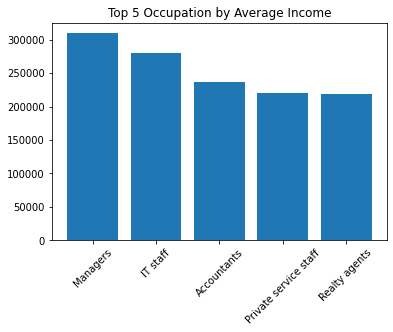

In [81]:
fig, ax = plt.subplots()
ax.set_title('Top 5 Occupation by Average Income')
ax.bar(top5_occupation.index,top5_occupation['AMT_INCOME_TOTAL'])
plt.xticks(rotation=45)

### Insight : Managers merupakan occupation dengan rata-rata penghasilan tertinggi dibandingkan dengan IT staff, accountants, private service staff, dan realty agents. 

-**Tiga status perkawinan (NAME_FAMILY_STATUS) yang paling sering dilakukan!**

In [62]:
status_count = df1[['NAME_FAMILY_STATUS']].groupby('NAME_FAMILY_STATUS').size()
status_count

NAME_FAMILY_STATUS
Civil marriage           733
Married                 6139
Separated                470
Single / not married    1159
Widow                    101
dtype: int64

### Status yang paling banyak adalah 'Married' sebanyak 6139 data